# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

These are the following questions that will be answered as we explore the data.
<ol>
    <li><a href="#genre">What are the Popular Genres From Year to Year</a></li>
    <li><a href="#revenue">What is the Yearly Revenue Change</a></li>
    <li><a href="#props">What are the properties associated with High Revenue Movies?</a></li>
    <li><a href="#director">Which Director directed **Most** Of the Top 20 Movies?</a></li>
    <li><a href="#actor">Which Actor is Present in **Most** of the Top 20 Revenue Movies?</a></li>
    <li><a href="#company">Which Production Company produced **Most** of Top 20 Revenue movies?</a></li>
    <li><a href="#title">What Are 20 The Top Revenue Movies From 1960 to 2015</a></li>
</ol>

In [165]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
sns.set()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [166]:
# load tmdb-movies csv into a dataframe and view first 5 rows
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [167]:
# check the number of rows and columns
movies_df.shape

(10866, 21)

In [168]:
# Get a quick statistics of the data
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [169]:
# View more details about the dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [170]:
# check the columns with empty values
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [171]:
# check for number of duplicates
movies_df.duplicated().sum()

1

### Data Cleaning

We observe from our initial checks on our dataset that there are duplicates and some missing values.

We are going to remove the duplicates and replace missing values in the following columns: 
**cast, director, keywords, genres, production_companies**

We will also drop some columns that will not be relevant to the questions we want to address i.e. 
**imdb_id, homepage, tagline and overview**

We saw that the **budget, revenue, budget_adj, revenue_adj** columns had a min value of 0.0 which is not a desired value given these analysis. These rows will be removed as well.

In [172]:
# remove duplicates
movies_df.drop_duplicates(inplace=True)

In [173]:
# verify duplicates removal
movies_df.duplicated().sum()

0

In [174]:
# confirm the new number of rows
movies_df.shape

(10865, 21)

In [175]:
# drop imdb_id, homepage, tagline and overview columns. 
movies_df.drop(['imdb_id', 'homepage','tagline', 'overview'], axis=1, inplace=True )
movies_df.shape

(10865, 17)

In [176]:
# remove rows if the budget or revenue or budget_adj or revenue_adj is 0.0
movies_df = movies_df.loc[(movies_df.budget * movies_df.revenue * movies_df.budget_adj* movies_df.revenue_adj) != 0]
movies_df.shape

(3854, 17)

In [177]:
# fill the missing values in the following columns with the values indicated
# cast = 'no_cast'
# director = 'no_director'
# keywords = 'no_keywords'
# genres = 'no_genres'
# production_companies = 'no_production_companies'

columns_to_fillna = ['cast', 'director', 'keywords', 'genres', 'production_companies']
for column in columns_to_fillna:
    movies_df[column] = movies_df[column].fillna('no_'+column)

# check the number of null values again
movies_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

<a id="genre"></a>
### Research Question 1 - What are the Popular Genres From Year To Year

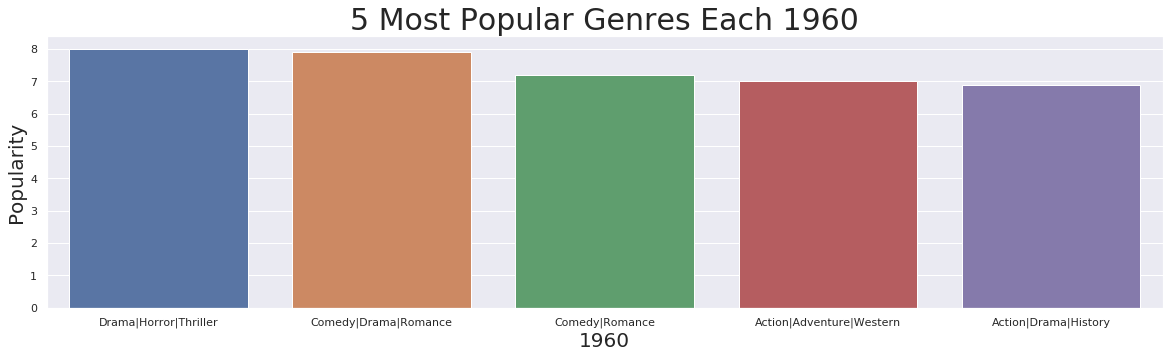

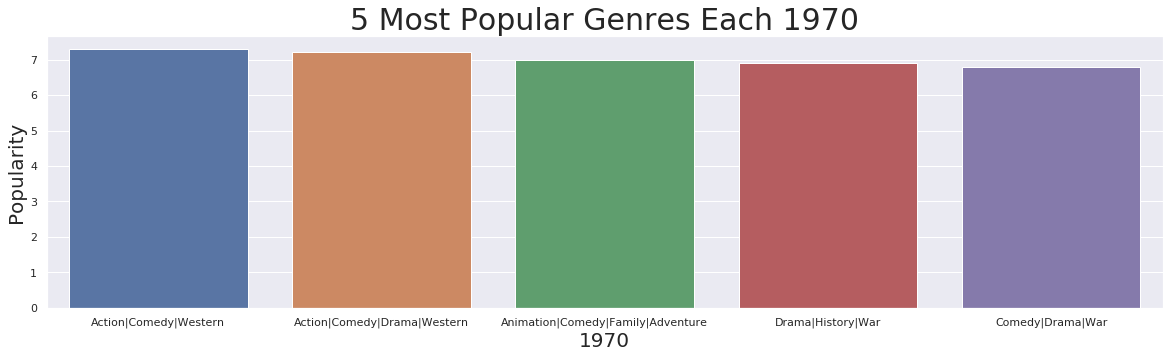

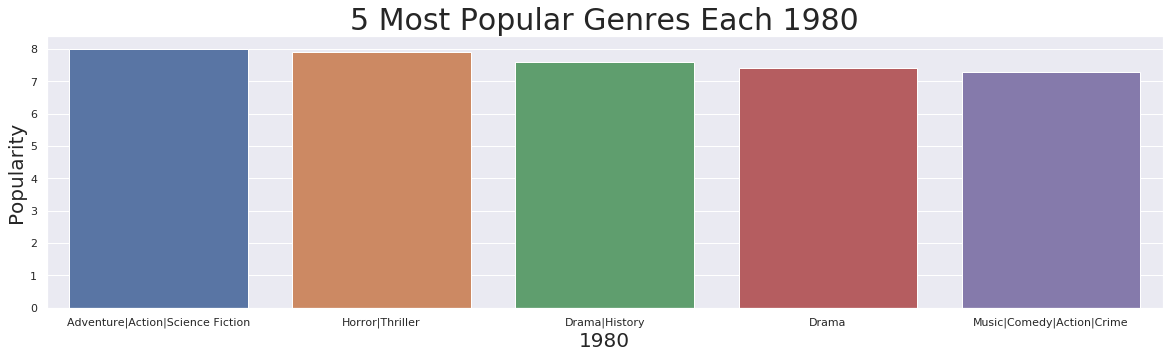

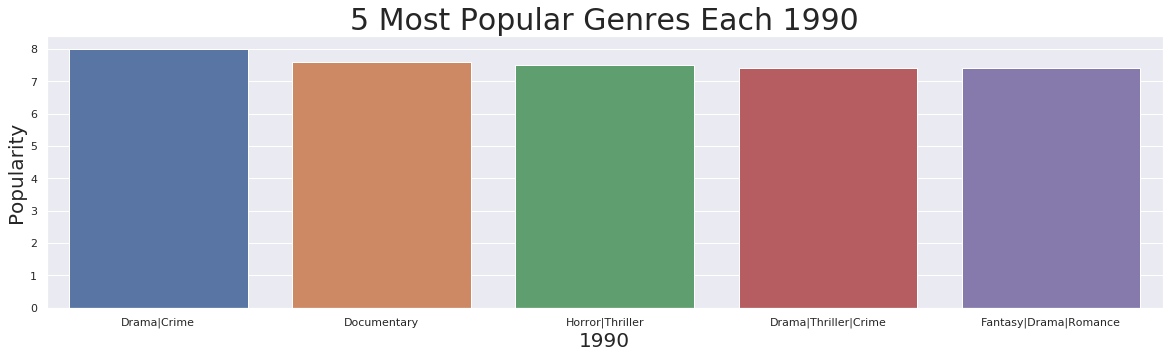

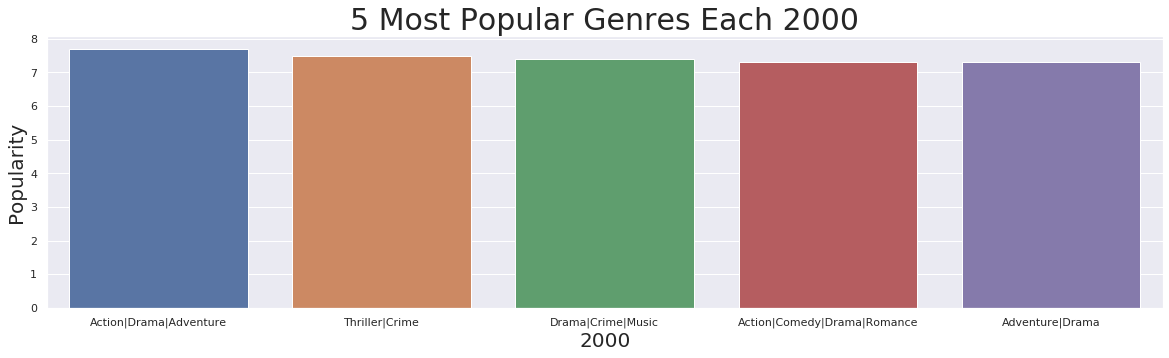

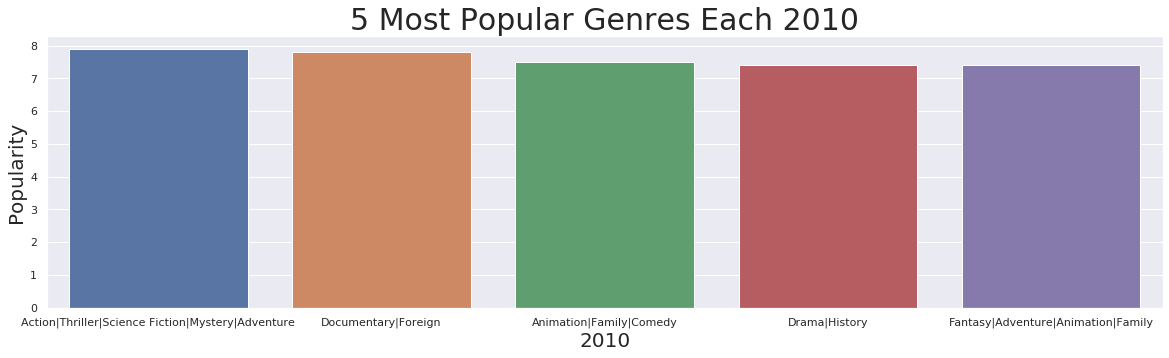

In [178]:
# Group The Genres by Year and Find the Most Popular Ones in Each Year using vote_average as the popularity metric
for year in np.arange(1960,2016, 10): # Interval can be changed if all the years need to appear.
    df = movies_df.query('release_year == @year').groupby('genres').mean().sort_values(by=['vote_average'], ascending=False).head(5)
    plt.subplots(figsize=(20, 5))
    sns.barplot(df.index,df['vote_average'])
    plt.title(f"5 Most Popular Genres Each {year}", fontsize=30)
    plt.ylabel('Popularity', fontsize=20)
    plt.xlabel(year, fontsize=20)

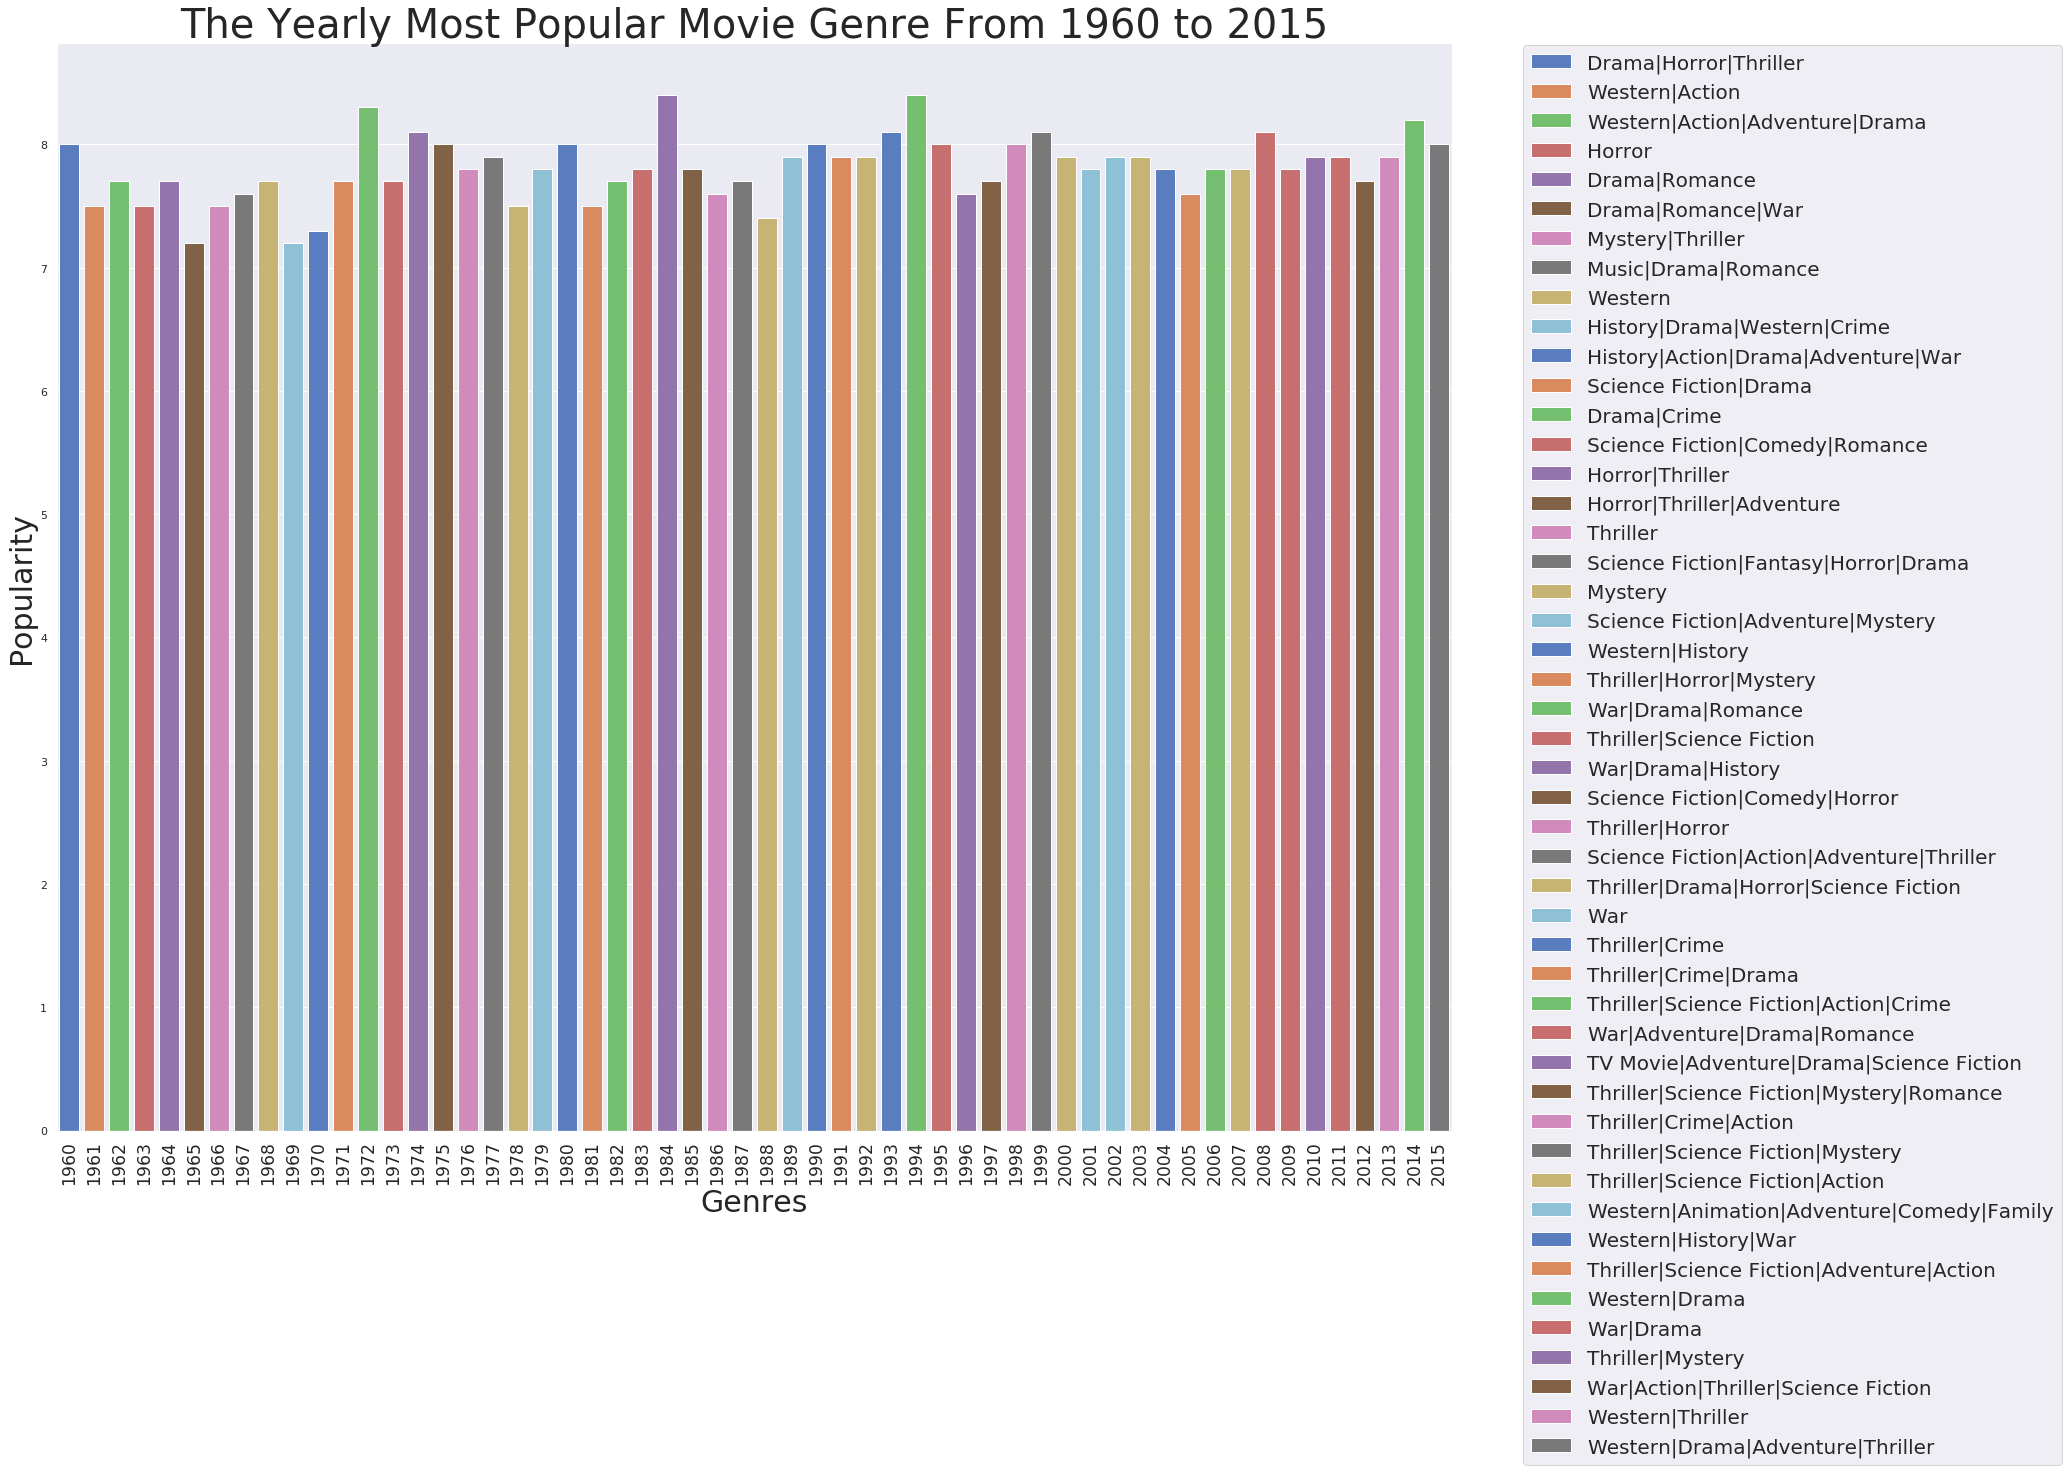

In [179]:
# Get the Most Popular Genre in Each Release Year
popular_genre_per_year = movies_df.groupby(['release_year'])[['vote_average','genres']].max()
plt.subplots(figsize=(25, 20))
graph = sns.barplot(
                    popular_genre_per_year.index,
                    popular_genre_per_year['vote_average'],
                    hue=popular_genre_per_year['genres'],
                    dodge=False,
                    palette='muted',
                   )
graph.set_xticklabels(graph.get_xticklabels(),
                      rotation=90,
                      fontweight='light',fontsize='xx-large'
                     )
graph.axes.set_title("The Yearly Most Popular Movie Genre From 1960 to 2015",fontsize=40)
graph.set_xlabel("Genres",fontsize=30)
graph.set_ylabel("Popularity",fontsize=30);

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, prop={'size': 20});


<a id="revenue"></a>
### Research Question 2 - What is the Yearly Revenue Change

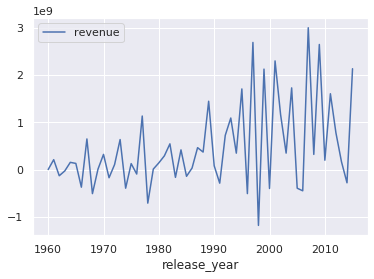

In [180]:
# Find the Sum of the Various Columns According to the Year the Movies Were Released
yearly_movies_sum = movies_df.groupby('release_year').sum()

# Find The Yearly Change in Revenue
yearly_movies_sum.apply(lambda x:x.diff().fillna(0))[['revenue']].plot();

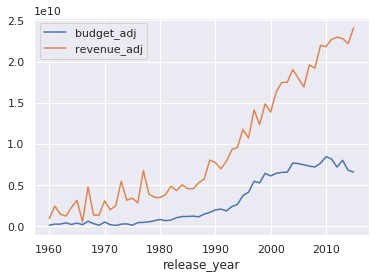

In [181]:
# Compare the Yearly sum for budget_adj and revenue_adj
yearly_movies_sum[['budget_adj', 'revenue_adj']].plot();

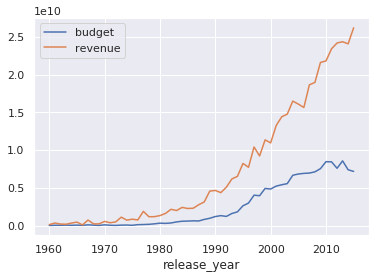

In [182]:
# Compare the Yearly sum for budget and revenue
yearly_movies_sum[['budget', 'revenue']].plot();

<a id="props"></a>
### Research Question 3 - What are the properties associated with High Revenue Movies?

In [183]:
# I chose movies with a Revenue Greater than the 90th Percentile as High Revenue Movies

# Calculate the 90th Percentile Revenue
ninety_percentile = np.percentile(movies_df['revenue_adj'], 90)

# Filter the movies with movies with revenue greater than 90th Percentile
highest_revenue_movies = movies_df.query('revenue_adj > @ninety_percentile')

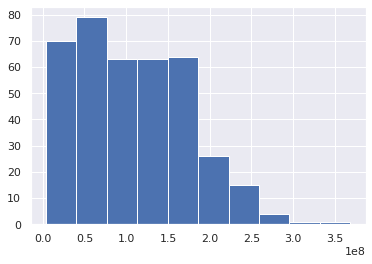

In [184]:
# Check the Budget for of High Revenue Movies
highest_revenue_movies['budget_adj'].hist();

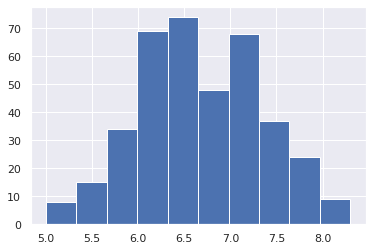

In [185]:
# Check the Vote Average (Popularity Metric) of High Revenue Movies
highest_revenue_movies['vote_average'].hist();

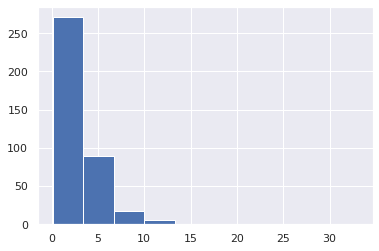

In [186]:
# Check the Popularity of High Revenue Movies
highest_revenue_movies['popularity'].hist();

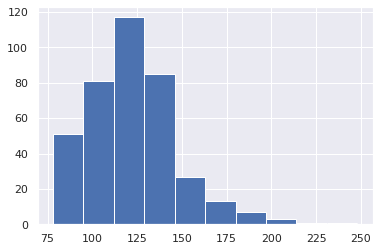

In [187]:
# Check the Runtime of High Revenue Movies - How Long The Movies span
highest_revenue_movies['runtime'].hist();

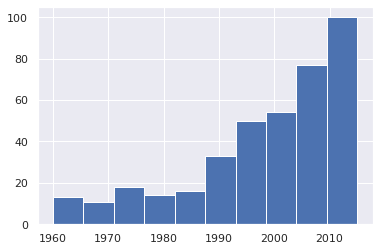

In [188]:
# Check the Release Year of High Revenue Movies
highest_revenue_movies['release_year'].hist();

### Define Variables and Functions to Be Used In Answering The Next 3 Questions

In [189]:
# Find the top 20 revenue movies
top_20_revenue = highest_revenue_movies.sort_values(by=['revenue_adj'], ascending=False).head(20)

In [190]:
def generate_plot(x_val, y_val, fig_size, title, x_label, y_label):
    plt.subplots(figsize=fig_size)
    sns.barplot(x_val, y_val)
    plt.title(title, fontsize=30)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20);

In [191]:
def generate_plot_df(column):
    # split the values that are pipe-separated     
    val_list = [val.split('|') for val in top_20_revenue[column]]
    
    top_val_list = []
    for new_val in val_list:
        for single in new_val:
            top_val_list.append(single)

    # get the value and count of each item in the top_val_list
    val_and_count = dict()
    for i in top_val_list:
        val_and_count[i] = val_and_count.get(i, 0)+1
    
    return val_and_count

<a id="director"></a>
### Research Questions 4 - Which Director directed **Most** Of the Top 20 Movies?

In [192]:
# # Find the directors that Feature on the top 20 of the Highest Revenue Movies
# generate_plot(x_val=top_20_revenue['revenue_adj'],
#               y_val=top_20_revenue['director'],
#               fig_size=(15, 15),
#               title='Movies with Highest Revenues by Director Names',
#               x_label='Revenue',
#               y_label='Directors'
#              )

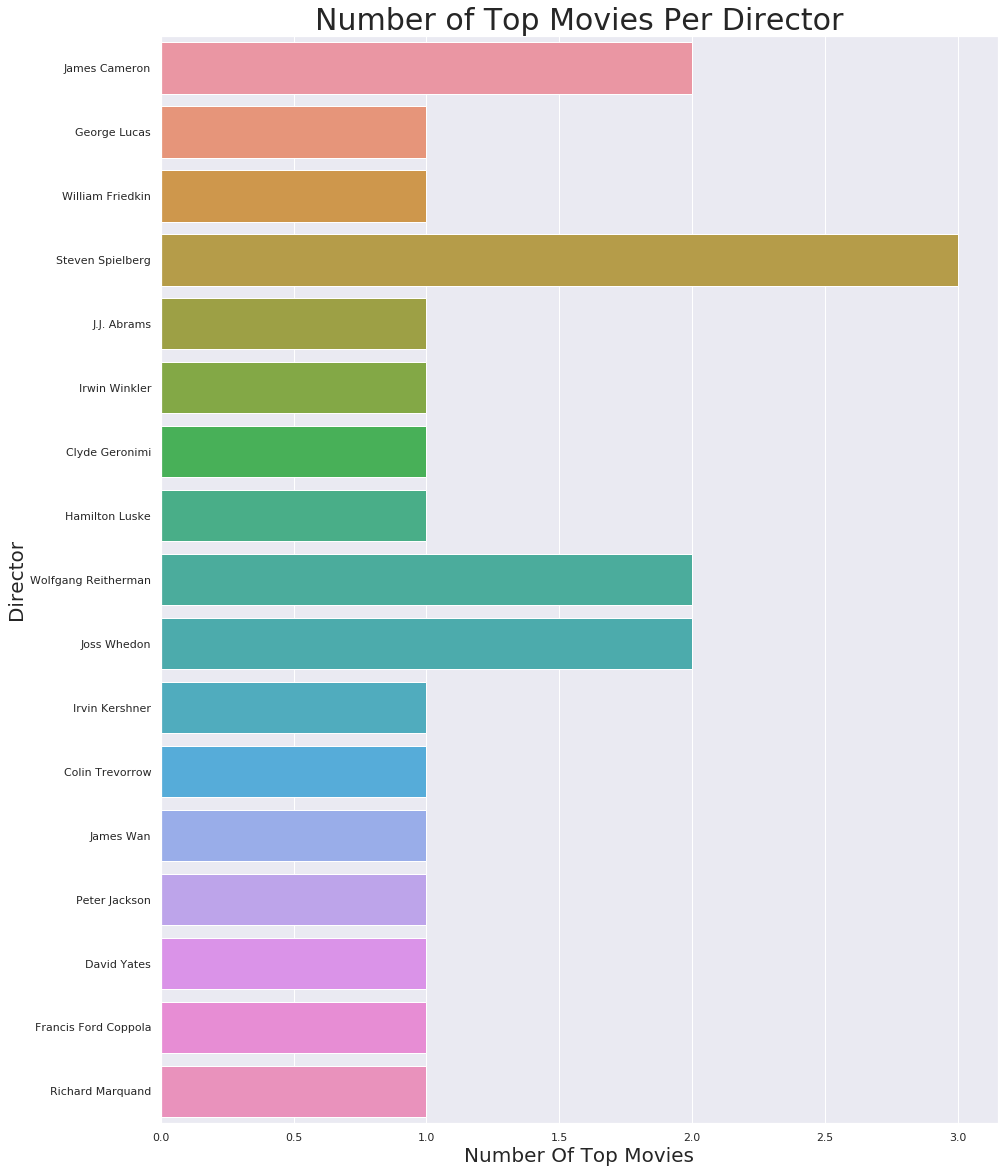

In [193]:
# Find the Director That Featured on Most of the Highest Revenue Movies

director_counts = generate_plot_df(column='director')
director_count_df = pd.DataFrame.from_dict(director_counts, orient="index")

# Generate the Plot
generate_plot(x_val=director_count_df[0],
              y_val=director_count_df.index,
              fig_size=(15,20),
              title='Number of Top Movies Per Director',
              x_label='Number Of Top Movies',
              y_label='Director'
             )

<a id="actor"></a>
### Research Question 5  - Which Actor is Present in **Most** of the Top 20 Revenue Movies?

In [194]:
# Find the Actors that Feature on the top 20 of the Highest Revenue Movies

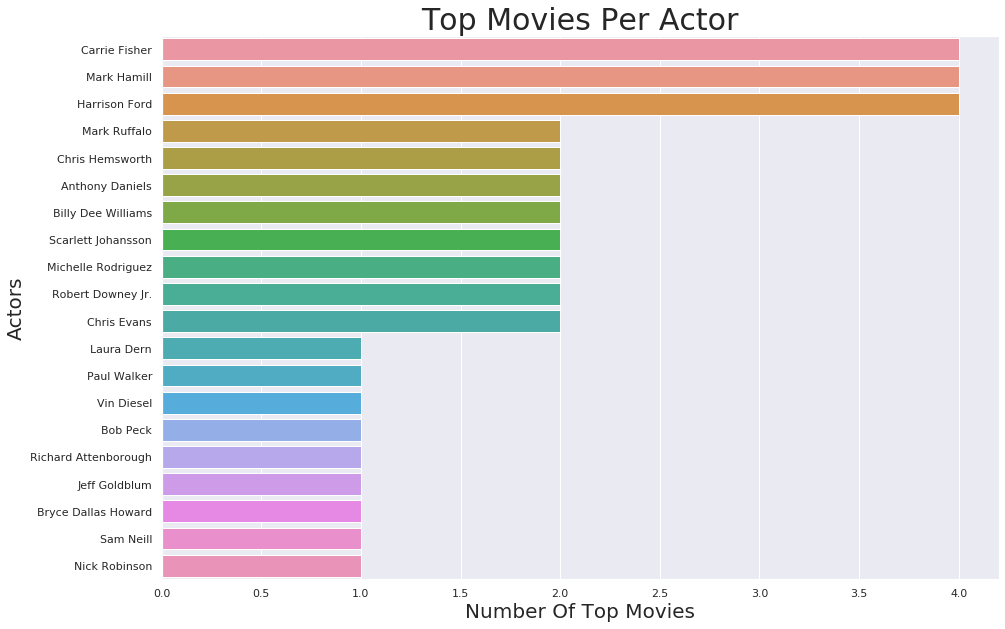

In [195]:
# Find the Actor That Featured on Most of the Highest Revenue Movies
actor_counts = generate_plot_df(column='cast')
actor_count_df = pd.DataFrame.from_dict(actor_counts, orient="index").sort_values(by=[0], ascending=False).head(20)

# Generate the Plot
generate_plot(x_val=actor_count_df[0],
              y_val=actor_count_df.index,
              fig_size=(15,10),
              title='Top Movies Per Actor',
              x_label='Number Of Top Movies',
              y_label='Actors'
             )

<a id="company"></a>
### Research Question 6  - Which Production Company produced **Most** of the Top 20 Revenue movies?

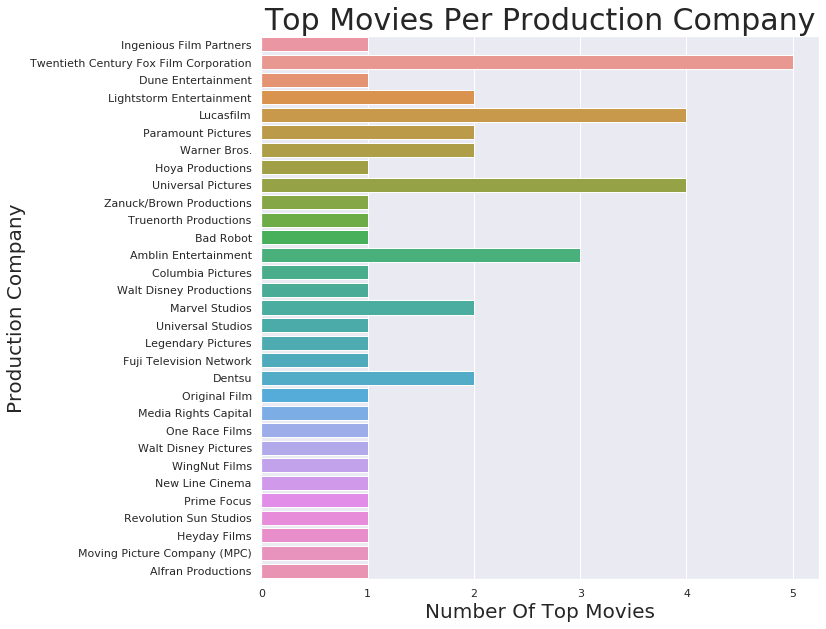

In [196]:
# Find the Production Company That Featured in Most of the Highest Revenue Movies
company_counts = generate_plot_df(column='production_companies')
company_count_df = pd.DataFrame.from_dict(company_counts, orient="index")

# Generate the Plot
generate_plot(x_val=company_count_df[0],
              y_val=company_count_df.index,
              fig_size=(10,10),
              title='Top Movies Per Production Company',
              x_label='Number Of Top Movies',
              y_label='Production Company'
             )

<a id="title"></a>
### Research Question 7 - What Are The Top 20 Revenue Movies From 1960 to 2015?

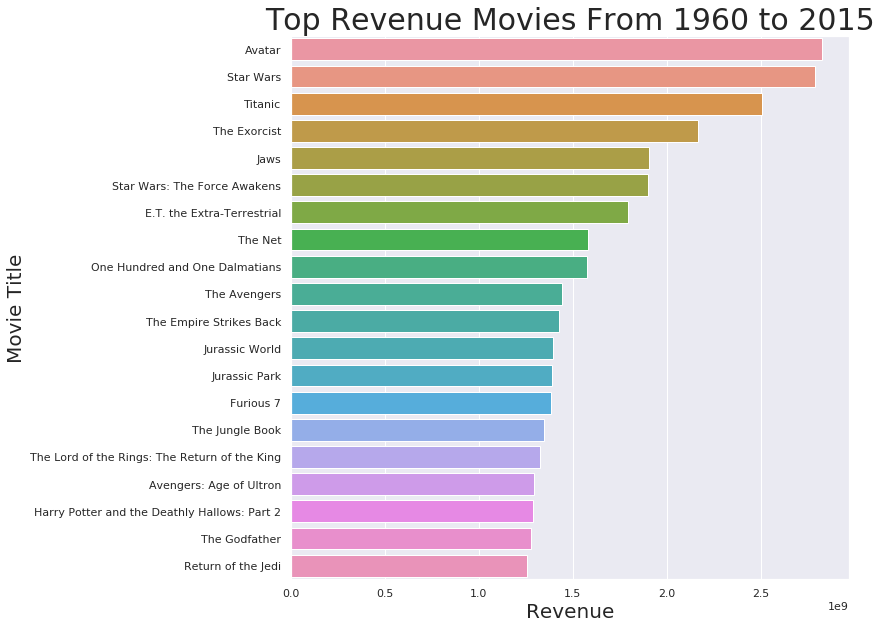

In [197]:
generate_plot(x_val=top_20_revenue['revenue_adj'],
              y_val=top_20_revenue['original_title'],
              fig_size=(10,10),
              title='Top Revenue Movies From 1960 to 2015',
              x_label='Revenue',
              y_label='Movie Title'
             )

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!